In [2]:
%run import.py

# Linear Models for Classification #

Linear models are also used for classification. Lets start with binary classification. In this cae a prediction is made using the following formulae

$$
\hat{y}=w[0]*x[0]+w[1]*x[1]+...+w[p]*x[p]+b>0
$$

The formula is very simlar to linear regression except that we threshold the predicted value at zero. That is if the function is smaller than zero we predict class -1 otherwise we predict class +1. For linear models for classification the decision boundary is a linear function of the inputs. A binary linear classifier seperates the two classes using a line, a plne or a hyper plane.

Different algorithms for linear classification differ in two ways

- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If and what kind of regularization they use

Two of the most common linear classification algorithms for classification are logistic regression and linear support vector machines (linear SVMs). We can apply both of these mehtods to the forge dataset and visualize the decision boundary:

/Users/kgteller/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/kgteller/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


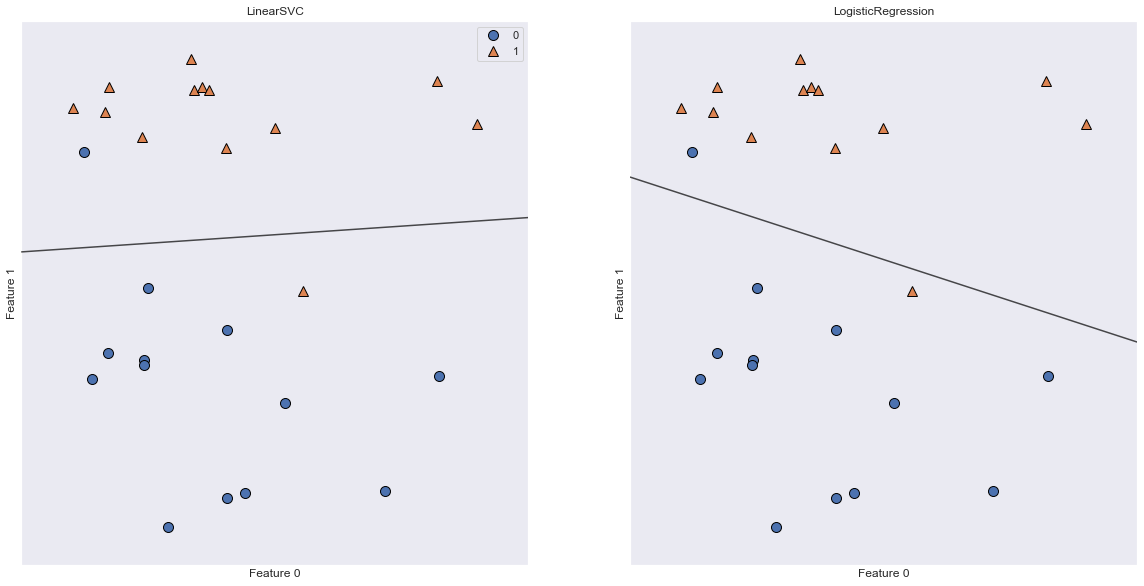

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1)], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
axes[0].legend()

The two models come up with slightly different decision boaundaries but in either case they both miss classify 2 points. In both models by default apply L2 regularization in the same way ridge regression did. For these two models the parameter that determines the strenght of regularization is the parameter C. For high values of C the model tries to fit the training data well and low values of C pu more emphasis on the weights being close to 0. Using low values of C causes the algorithm to adjust to the majority while using higher values of C stress the importance of each data point being classified correctly.

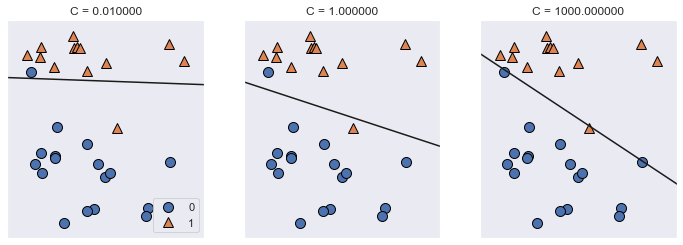

In [4]:
 
from sklearn.datasets import make_blobs
from mglearn.plot_helpers import discrete_scatter

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

for ax, C in zip(axes, [1e-2, 1, 1e3]):
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    svm = LogisticRegression(C=C, tol=0.00001, dual=False).fit(X, y)
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(6, 13)
    yy = a * xx - (svm.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = %f" % C)
axes[0].legend(loc="best")


On the left a small C corresponds to a lot of regularization. The line is nearly horizontal becasue many of the weights are nearly 0 and it miss classifies 2 of the points. In the middle scase the line is tilted trying to classify the 2 misclassified points correctly. With a very high C value all of the points belonging to class 0 are classifies correctly but 1 point in class 1 is missclassified. Thus illistrated that the plot on the right is tryin to correctly classify all the points but is most likely overfitting. When we have data with many features it is important to consider the C paramter and check if we are overfitting. Lets analyze logistic regression on the Breast Cance data set:

In [5]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.958
Test set score: 0.958


Becasue these are exactly the same we ar most likiely underfitting

In [6]:

logreg100 = LogisticRegression(C=100,max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


Better accuracy and seperation means we are near the sweet spot.

In [7]:
logreg001 = LogisticRegression(C=0.01,max_iter=1000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


underfitting even more

Like we did for regression with regularization we can look at the weights learned for different C values

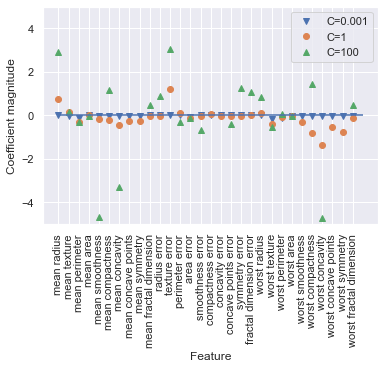

In [8]:
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we want to interpret our model using an L1 regularization can help. Lets look at how L1 regularization does with Logistic Regression on the Breast cancer Data set:

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


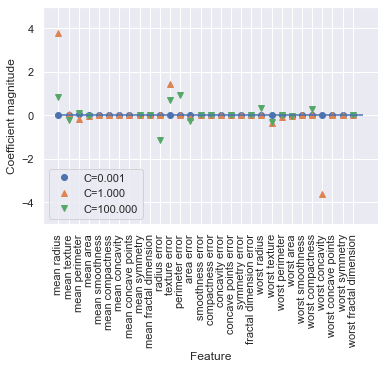

In [31]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear',penalty="l1",max_iter=100000).fit(X_train, y_train) 
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear models for multiclass classification ###

Nost linear classification models are for binary classes and dont extend naturally to the multiclass case (with the exception of logistic regression). To extend this binary classification to a multiclass classification most algorithms use a one vs rest approach. in this case a binary model is fit for each class compared to the other clases. To make a prediction all the binary classifiers are run on the test point. the classifier with the highest score on ots class end up being the prediction.

Lets apply this mehtod with threee classes and two features.

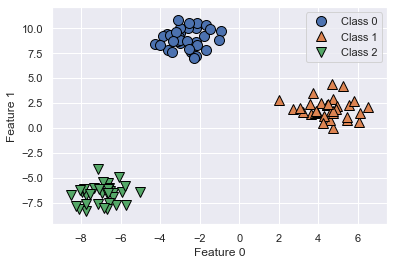

In [34]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [35]:
logistic_regression=LogisticRegression().fit(X,y)
print("Coefficient shape: ", logistic_regression.coef_.shape) 
print("Intercept shape: ", logistic_regression.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


The shape of the coefficient tells us for the 3 classes there are 2 weights. The shape of the intercept tells us there are 3 intercepts. Lets visualize the three binary classifiers:

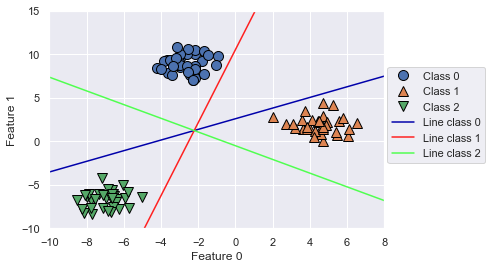

In [38]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logistic_regression.coef_, logistic_regression.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

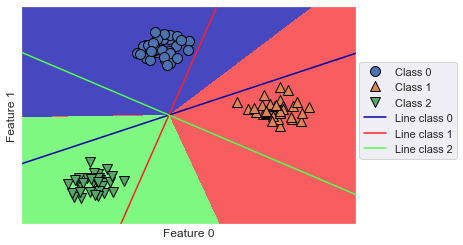

In [41]:
mglearn.plots.plot_2d_classification(logistic_regression, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logistic_regression.coef_,logistic_regression.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We can also compare this to linear SVM:

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


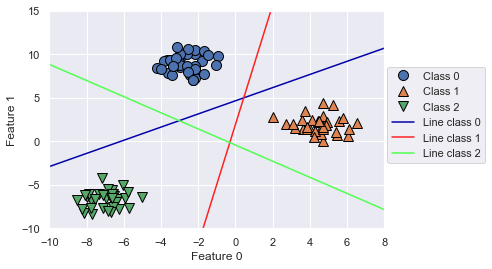

In [37]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))


Text(0, 0.5, 'Feature 1')

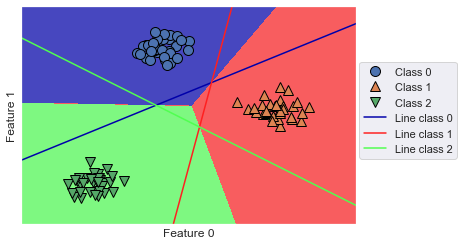

In [40]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Strengths Weaknesses and Parameters ###

In Logistic regression and Linear SVC the main paramter is the regularization paramter C. For small values of C we produce a simple model. Tuning of this paramter is important for creating a modle and is usually looked at on a log scale. The other decision that is neccesary is whether to use L1 or L2 regularization. If you think that only a few of your features are important you should use L1. Other wise you should use L2. Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thou‐ sands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression